In [3]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:

X = np.array([5.5,6.0,6.5,6.0,5.0,6.5,4.5,5])
y = np.array([420,380,350,400,440,380,450,420])


In [5]:
reg = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))
y_pred = reg.predict(X.reshape(-1, 1))
print(mean_squared_error(y, y_pred))

121.7741935483871


In [6]:
coef = reg.coef_ 
intercept = reg.intercept_ 
print(reg.score(X.reshape(-1,1),y.reshape(-1,1)))

0.8782258064516129


In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(X,y_pred,'r')
plt.scatter(X,y)
plt.plot(X,(coef*X-intercept).reshape(8,),'g')
plt.show()

<Figure size 640x480 with 1 Axes>

## Eucalyptus

In [8]:
data = np.loadtxt("eucalyptus.txt")
X = data[:,0]
y = data[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


[]

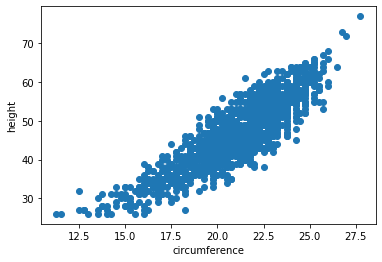

In [9]:
plt.figure()
plt.scatter(X,y)
plt.xlabel("circumference")
plt.ylabel("height")
plt.plot()

16.686803010477075


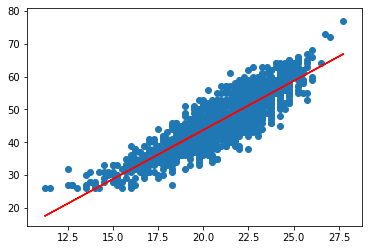

[0.74395777 0.79008327 0.70024039 0.71624377 0.78274856]


In [58]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))
y_pred = reg.predict(X.reshape(-1, 1))
print(mean_squared_error(y, y_pred))

import matplotlib.pyplot as plt
plt.figure()
plt.plot(X,y_pred,'r')
plt.scatter(X,y)
#plt.plot(X,(coef*X-intercept).reshape(X),'g')
plt.show()

print(cross_val_score(reg,X.reshape(-1, 1),y.reshape(-1, 1),cv=5))


In [40]:
X_root = np.sqrt(X)

In [44]:
X_non_lin =np.vstack((X,X_root ))
print(X_non_lin.T.shape)


(1429, 2)


In [39]:
z = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
z.shape

(4, 2)

16.05912111886697


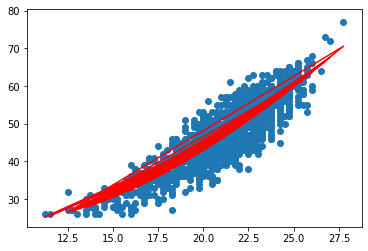

In [74]:
reg = LinearRegression().fit(X_non_lin.T, y.reshape(-1, 1))
y_pred = reg.predict(X_non_lin.T)
print(mean_squared_error(y, y_pred))
y_new = y_pred.T.flatten()
import matplotlib.pyplot as plt
plt.figure()
#plt.plot(X,y_new,'r')
plt.plot(X,reg.predict(X_non_lin.T),'r')
plt.scatter(X,y)
plt.show()


In [71]:
print(reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


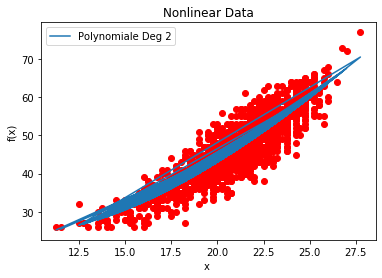

In [86]:
# A vous
Y = y
outcome = np.array(Y)
ones = np.ones(len(Y))

# x^2 
X_2 = [np.sqrt(i) for i in X]

design = np.column_stack([ones, X, X_2])

def linear_reg(y,X):
    
    # X transpose
    Xtranspose = np.matrix.transpose(X)
    
    # BetaHat = inv(X'X)*X'y
    BetaHat = np.dot(np.linalg.inv(np.dot(Xtranspose,X)),np.dot(Xtranspose,y))
    
    return BetaHat
  

# (Beta0, ..., Beta4)
betahat = linear_reg(outcome,design)


plt.plot(X, Y, 'ro')
plt.xlabel("x ")
plt.ylabel("f(x)")
plt.title("Nonlinear Data")


pred_yhat = betahat[0] + betahat[1]*np.asarray(X) + betahat[2]*np.asarray(X_2)
simple, = plt.plot(X, pred_yhat)


plt.legend([simple], ['Polynomiale Deg 2'])
plt.show()

In [82]:
print ('Estimation des pramètres de regression: %s' %betahat)

Estimation des pramètres de regression: [117.04663194   9.68073623 -59.8294074 ]
